# [Formação: Deep Learning com Pytorch](https://unibb.alura.com.br/formacao-deep-learning-pytorch)

## Parte 2/3: Imagens no contexto de deep learning

In [1]:
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from torch import nn, optim
from torchsummary import summary
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

from skimage import io, color, transform, data


%matplotlib inline
%config IPCompleter.use_jedi = False

___
### [Redes Neurais Convolucionais: Deep Learning com PyTorch ](https://unibb.alura.com.br/course/pln-deep-learning)

In [2]:
from torchvision.datasets import MNIST

In [3]:
dataset_mnist = MNIST('datasets/',
              train=True,
              transform=transforms.ToTensor())

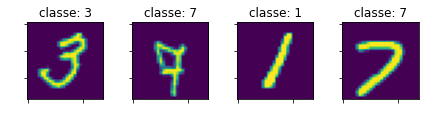

In [4]:
from random import choice

row, col, idx = 1, 4, 1

plt.figure(figsize=(6, 6))

for i in range(row * col):
    i, c = choice(dataset_mnist)
    plt.subplot(4, 4, idx)
    plt.imshow(i[0])
    plt.title(f'classe: {c}')
    plt.xticks(color='w')
    plt.yticks(color='w')
    idx += 1

plt.tight_layout()
plt.show()

In [5]:
from torchvision.datasets import VOCDetection

In [6]:
try:
    dataset_voc = VOCDetection(root='datasets/',
                               year='2012',
                               image_set='train',
                               download=True,
                               transform=transforms.ToTensor())
except ConnectionResetError as e:
    print(e)

[Errno 104] Connection reset by peer


## ...

_Bouding box_ é a 'caixa' que contem o objeto desejado. Portanto, uma bounding box será formada por 4 pontos (vértices), cada um com seu par de coordenadas.


Perceba que, apenas com os valores de $xmin, xmax, ymin, ymax$.

Graças as propriedades dos quadriláteros, podemos construir uma bounding box.

In [7]:
from torchvision.datasets import VOCSegmentation

In [8]:
try:
    dataset_voc = VOCSegmentation(root='datasets/',
                                  year='2012',
                                  image_set='val',
                                  download=True,
                                  transform=transforms.ToTensor(),
                                  target_transform=transforms.ToTensor())
except ConnectionResetError as e:
    print(e)

[Errno 104] Connection reset by peer


## ...

- ### Conv 1D (ao longo de um eixo)

In [9]:
from scipy.signal import convolve

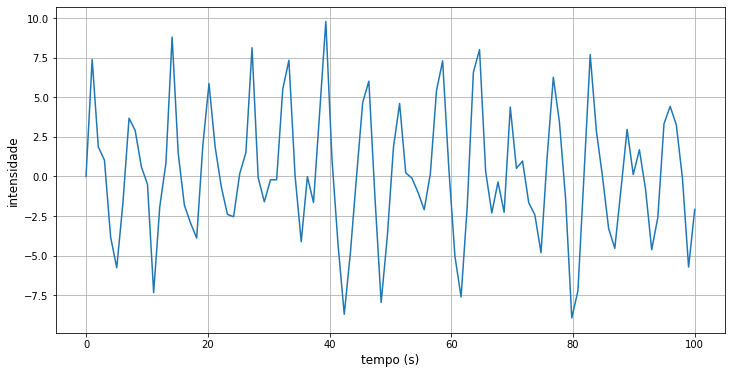

In [10]:
np.random.seed(5)

x = np.linspace(0, 100, 100)
# Seja y = f(x) = 10 * np.sin(x) * np.random.rand(x.shape[0])
y = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.xlabel('tempo (s)', fontsize=12)
plt.ylabel('intensidade', fontsize=12)
plt.grid()
plt.show()

In [11]:
def show(valores, titulo, filtro=None):
    plt.figure(figsize=(len(valores), 2))
    plt.imshow(valores[np.newaxis, :], cmap='gray')
    for i, v in enumerate(valores):
        plt.text(x=i-0.25,
                 y=0+0.125,
                 s=f'{v:.1f}',
                 fontsize=16,
                 color='r',
                 bbox=dict(facecolor='white', alpha=1))
        if filtro:
            if i in range(len(valores))[-3::]:
                plt.text(x=i-0.25, y=1.55, s='\u2193', fontsize=24, color='r')
    plt.title(titulo, fontsize=16)
    plt.yticks([])

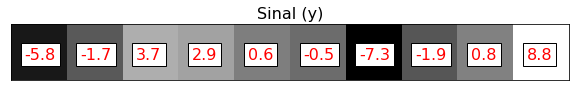

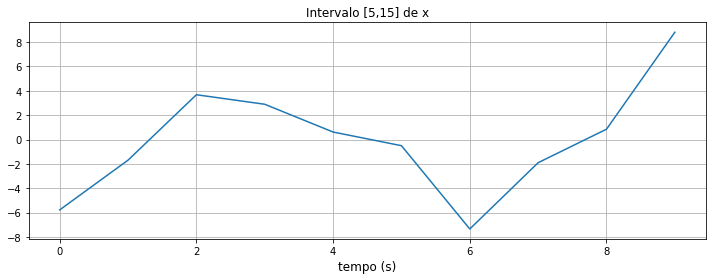

In [12]:
sinal = y[5:15]

show(sinal, 'Sinal (y)')
plt.xticks([])
plt.figure(figsize=(10, 4))
plt.plot(sinal)
plt.title('Intervalo [5,15] de x')
plt.xlabel('tempo (s)', fontsize=12)
# plt.ylabel('oscilação', fontsize=12)
plt.tight_layout()
plt.grid()
plt.show()

- Kernel (filtro)

In [13]:
kernel_crescente = [1, 0, -1]  # porém, o kernel é aplicado de forma INVERSA
kernel_crescente = np.flip(kernel_crescente)
kernel_crescente

array([-1,  0,  1])

# ----- Iteração num. 1 --------------------------------------------- #
				Resultado da convolução = -9.44


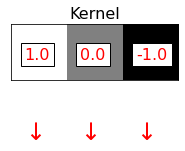

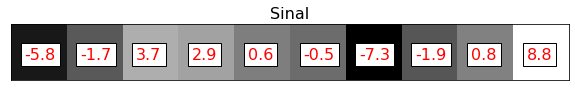

# ----- Iteração num. 2 --------------------------------------------- #
				Resultado da convolução = -4.58


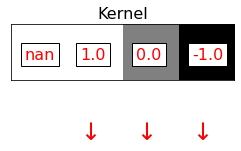

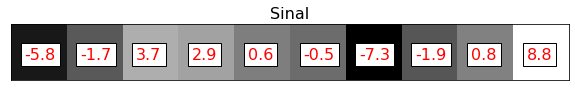

# ----- Iteração num. 3 --------------------------------------------- #
				Resultado da convolução = 3.06


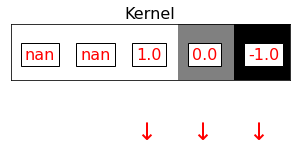

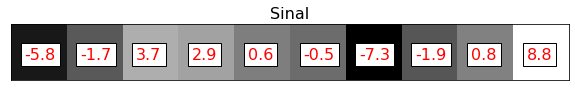

# ----- Iteração num. 4 --------------------------------------------- #
				Resultado da convolução = 3.40


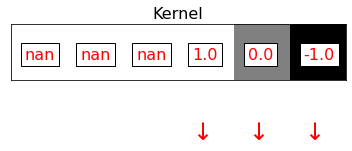

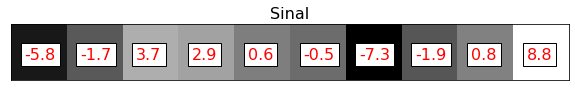

# ----- Iteração num. 5 --------------------------------------------- #
				Resultado da convolução = 7.95


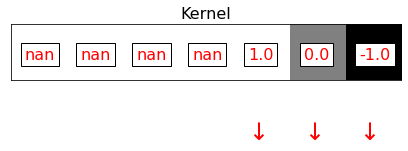

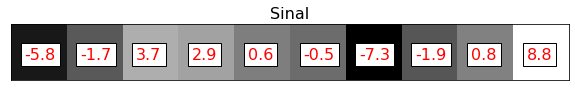

# ----- Iteração num. 6 --------------------------------------------- #
				Resultado da convolução = 1.39


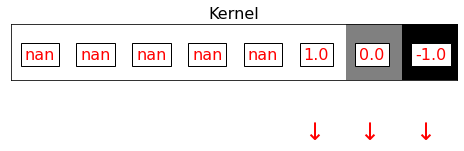

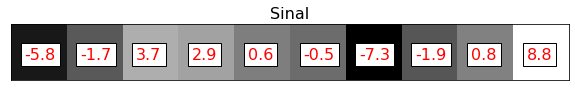

# ----- Iteração num. 7 --------------------------------------------- #
				Resultado da convolução = -8.18


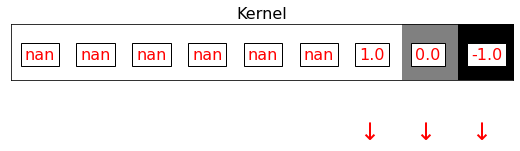

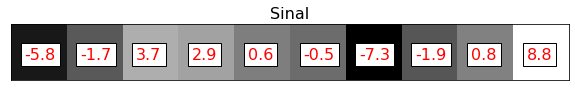

# ----- Iteração num. 8 --------------------------------------------- #
				Resultado da convolução = -10.70


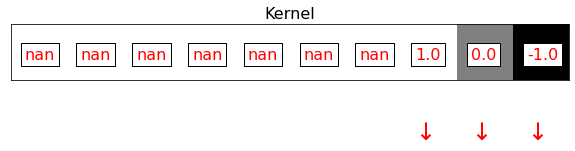

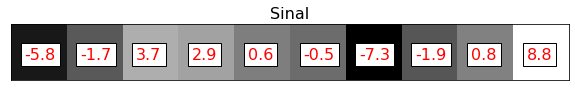

In [14]:
conv_manual = []

desloc_max = 8

for d in range(desloc_max):
    print(f'# ----- Iteração num. {d+1} {"-" * 45} #')
    deslocamento = [np.nan] * d
    kernel_deslocado = np.hstack((deslocamento, kernel_crescente[::-1]))
    show(kernel_deslocado, 'Kernel', True)
    plt.xticks([])
    show(sinal, 'Sinal')
    plt.xticks([])

#     print(kernel_deslocado)
#     print(sinal[:len(kernel_deslocado)])

    _ = kernel_deslocado * sinal[:len(kernel_deslocado)]  # convolução
    conv = np.nansum(_)
    conv_manual.append(conv)
    _ = '\t' * 4 + f'Resultado da convolução = {conv:.2f}'
    print(_)

    plt.show()

conv_manual = np.array(conv_manual)

___

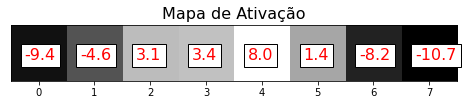

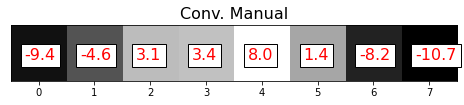

In [15]:
ativacao = convolve(sinal, kernel_crescente, mode='valid')

show(ativacao, 'Mapa de Ativação')
show(conv_manual, 'Conv. Manual')

Saiba que a '_ativação_', resultado de uma operação de convolução, também é mais conhecida como: _**feature map**_ (mapa de características).

Aplicando a convoluçao em todo o $y$:

(lembrando que $y = f(x)$)

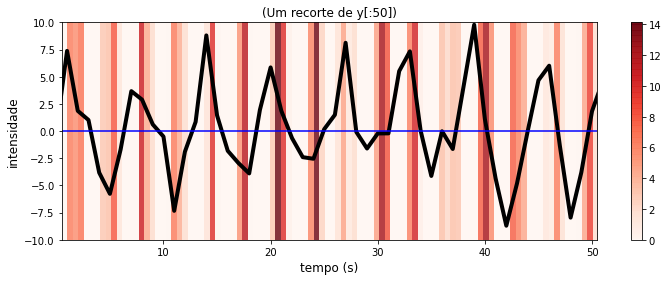

In [16]:
ativacao_y = convolve(y, kernel_crescente, mode='valid')
ativacao_y[ativacao_y < 0] = 0  # filtrando saídas

plt.figure(figsize=(12, 4))
plt.plot(y, color='k', linewidth=4)

plt.plot(range(100), [0] * 100, color='b')

recorte = 50
plt.imshow(X=ativacao_y[np.newaxis, :],
           cmap='Reds',
           aspect='auto',
           extent=[0.5, recorte+0.5, -10, 10],
           alpha=0.8)

plt.title(f'(Um recorte de y[:{recorte}])')  # em virtude da qualidade da vizualização
plt.xlabel('tempo (s)', fontsize=12)
plt.ylabel('intensidade', fontsize=12)
plt.colorbar()
plt.show()

- ### Conv 2D (vertical e horizontal)

In [17]:
# skimage.data, Standard test images
img = data.brick()
img

array([[ 99,  98,  99, ..., 166, 160, 150],
       [ 99, 100,  99, ..., 174, 167, 152],
       [ 98,  98,  98, ..., 171, 170, 156],
       ...,
       [ 99,  98, 100, ..., 179, 186, 185],
       [ 98,  98, 101, ..., 182, 185, 182],
       [ 98,  99, 102, ..., 179, 183, 176]], dtype=uint8)

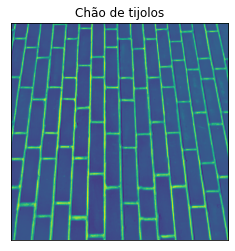

In [18]:
plt.imshow(data.brick())
plt.title('Chão de tijolos')
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
def show_kernel(valores, titulo=None):
    plt.figure(figsize=(len(valores), len(valores)))
    plt.imshow(valores, cmap='gray')
    for i, linha in enumerate(valores):
        for j, coluna in enumerate(linha):
            plt.text(x=j,
                     y=i,
                     s=f'{coluna:.0f}',
                     fontsize=16,
                     color='r',
                     bbox=dict(facecolor='white', alpha=1))
    plt.title(titulo)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Relembrando**: Transpor (transposição de) uma matriz significa transformar suas linhas em colunas!

In [20]:
kernel_v = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

kernel_h = np.transpose(kernel_v)  # transpor: linhas -> colunas

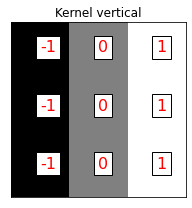

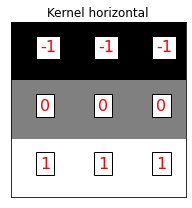

In [21]:
show_kernel(kernel_v, 'Kernel vertical')
show_kernel(kernel_h, 'Kernel horizontal')

In [22]:
feature_map = convolve(img, kernel_v, mode='valid')

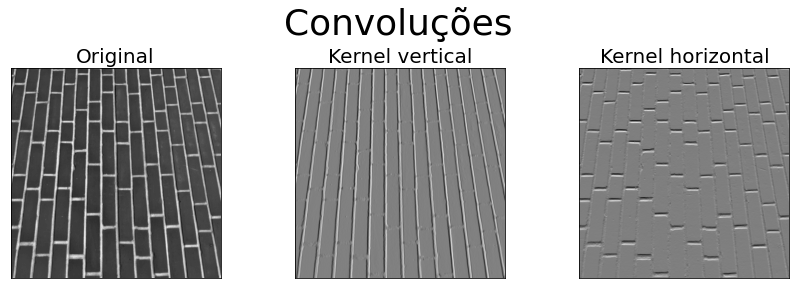

In [23]:
plt.figure(figsize=(12, 4))
plt.suptitle('Convoluções', fontsize=36)

_i = [
    img,
    convolve(img, kernel_v, mode='valid'),
    convolve(img, kernel_h, mode='valid')
]
_t = ('Original', 'Kernel vertical', 'Kernel horizontal')

r, c, idx = 1, 3, 1

for i in range(1, r*c + 1):
    plt.subplot(r, c, i)
    plt.imshow(_i[i-1], cmap='gray')  # visualizar apenas em tons de cinza
    plt.title(_t[i-1], fontsize=20)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

- ### Filtros manuais

Filtros para médias:

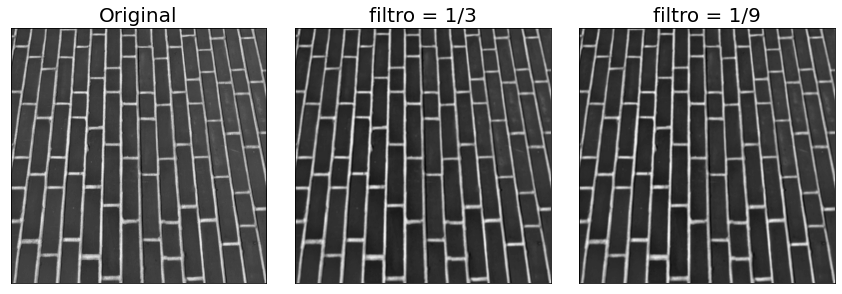

In [24]:
filtro = np.zeros((3,3))
f3 = filtro[:] + 1/3
f9 = filtro[:] + 1/9

plt.figure(figsize=(12, 4))

_i = [
    img,
    convolve(img, f3, mode='valid'),
    convolve(img, f9, mode='valid'),
]
_t = ('Original', 'filtro = 1/3', 'filtro = 1/9')

r, c, idx = 1, 3, 1

for i in range(1, r*c + 1):
    plt.subplot(r, c, i)
    plt.imshow(_i[i-1], cmap='gray')  # visualizar apenas em tons de cinza
    plt.title(_t[i-1], fontsize=20)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

Filtro Laplace

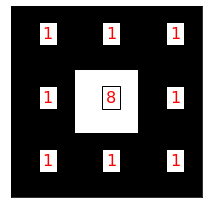

In [25]:
filtro_laplace = np.ones((3,3))
filtro_laplace[1,1] = 8
filtro_laplace

show_kernel(filtro_laplace, '')

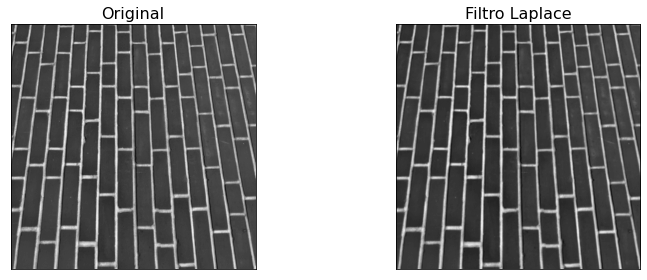

In [26]:
plt.figure(figsize=(12, 4))

_t = ('Original', 'Filtro Laplace')

idx = 1
for d in [img, convolve(img, filtro_laplace, mode='valid')]:
    plt.subplot(1, 2, idx)
    plt.title(_t[idx-1], fontsize=16)
    plt.imshow(d, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    idx += 1

plt.tight_layout()
plt.show()

- ### Patches

In [27]:
img = 'etc/aviao.jpg'
img = io.imread(img)

In [28]:
img.shape

(408, 612, 3)

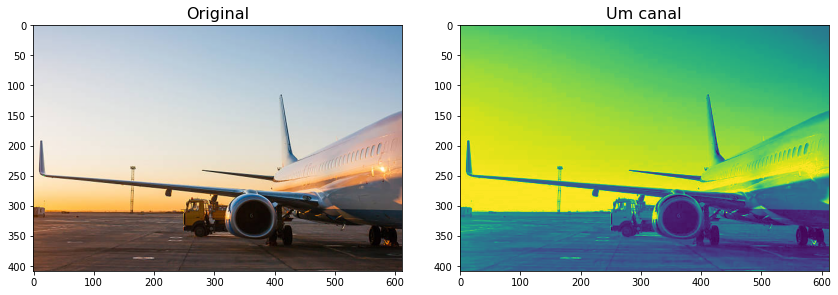

In [29]:
plt.figure(figsize=(12, 4))

idx = 1
for i,t in zip([img, img[:,:,0]], ('Original', 'Um canal')):
    plt.subplot(1, 2, idx)
    plt.title(t, fontsize=16)
    plt.imshow(i)
    idx += 1

plt.tight_layout()
plt.show()

Adicionando o retângulo (`patch`), segundo a documentação:


    A rectangle defined via an anchor point *xy* and its *width* and *height*.

    The rectangle extends from ``xy[0]`` to ``xy[0] + width`` in x-direction
    and from ``xy[1]`` to ``xy[1] + height`` in y-direction. ::

                      +------------------+
                      |                  |
                    height               |
                      |                  |
                     (xy)---- width -----+

Portanto,

nossos pontos seriam:

    (x, y + height)------------(x + width, y + height)
      |                              |
      |                              |
    (x, y)---------------------(x + width, y)

Assim, nosso retângulo será dado como:

$ret = [x, y, altura, largura]$


In [30]:
x, y, altura, largura = 320, 280, 80, 80

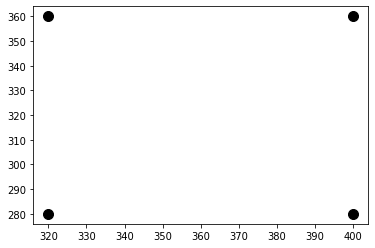

In [31]:
for d in [(x, y), (x, y + altura), (x + largura, y), (x + largura, y + altura)]:
    plt.plot(d[0], d[1], marker='o', markersize='10', color='k')

plt.show()

Portanto, 

In [32]:
ret = [x, y, altura, largura]
ret

[320, 280, 80, 80]

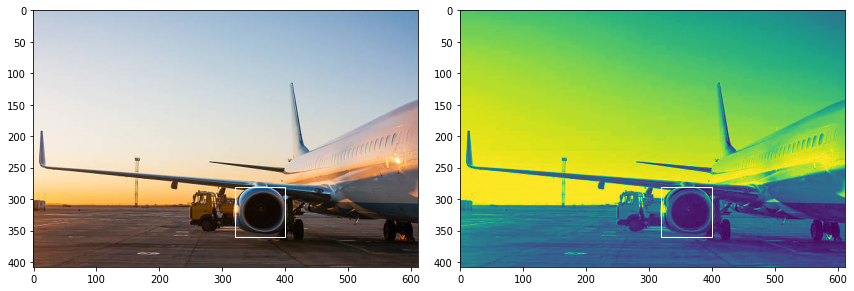

In [33]:
fig = plt.figure(figsize=(12, 4))

idx = 1
for imagem in [img, img[:,:,0]]:
    ax = fig.add_subplot(1, 2, idx)
    ax.imshow(imagem)
    ax.add_patch(patches.Rectangle(xy=(ret[0], ret[1]), height=ret[2], width=ret[3], color='white', fill=False))
    idx += 1

plt.tight_layout()
plt.show()

Aparentemente essa imagem não tem as cores bem distribuídas nos canais RGB:

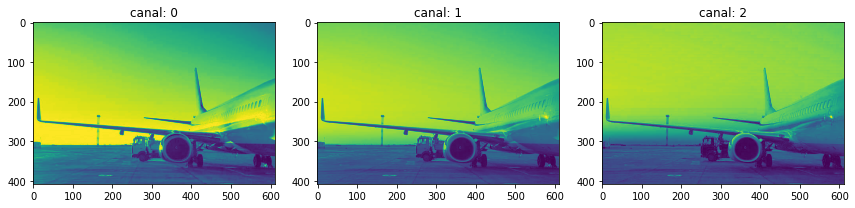

In [34]:
plt.figure(figsize=(12, 4))

idx = 1
for imagem,c in zip([img[:,:,0], img[:,:,1], img[:,:,2]], (0, 1, 2)):
    plt.subplot(1, 3, idx)
    plt.title(f'canal: {c}')
    plt.imshow(imagem)
    idx += 1

plt.tight_layout()
plt.show()

Extraindo um filtro a partir do `patch` (retângulo), recortando na imagem a área do patch:

(utilizaremos apenas um canal)

In [35]:
ret

[320, 280, 80, 80]

x: 320 -> 400, y: 280 -> 360


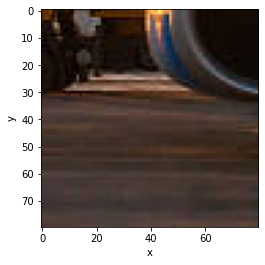

In [36]:
patch = img[x:x+largura, y:y+altura]

print(f'x: {x} -> {x+largura}, y: {y} -> {y+altura}')

plt.imshow(patch, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(80, 80)


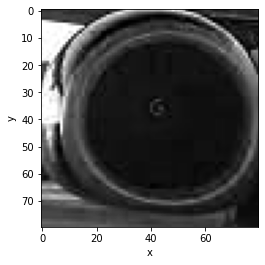

In [37]:
# aparentemente o slice é feito com [y_1:y_2, x_1:x_2] <=> [y:y+altura, x:x+altura]
# vai entender...

patch = img[ret[1]:ret[1]+ret[2], ret[0]:ret[0]+ret[3], 0]

print(patch.shape)

plt.imshow(patch, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(80, 80)


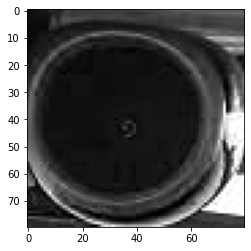

In [38]:
kernel_turbina = img[ret[1]:ret[1]+ret[2], ret[0]:ret[0]+ret[3], 0]
kernel_turbina = patch - np.mean(kernel_turbina)
kernel_turbina = np.flip(kernel_turbina)

print(kernel_turbina.shape)
plt.imshow(kernel_turbina, cmap='gray')
plt.show()

In [39]:
conv_turbina = convolve(img[:,:,0], kernel_turbina, mode='same')  # ``mode='same'`` para manter as dimensões

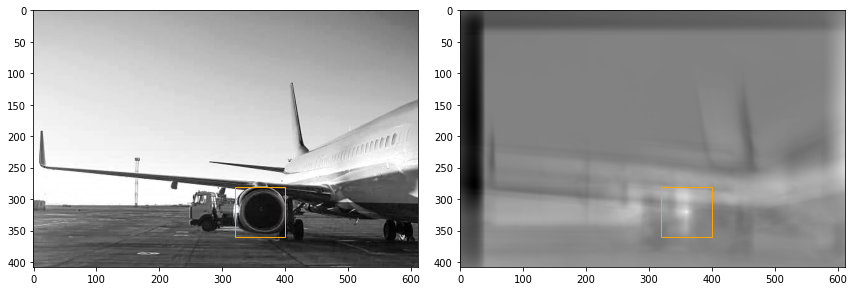

In [40]:
fig = plt.figure(figsize=(12, 4))

idx = 1
for imagem in [img[:,:,0], conv_turbina]:
    ax = fig.add_subplot(1, 2, idx)
    ax.imshow(imagem, cmap='gray')
    ax.add_patch(patches.Rectangle(xy=(ret[0], ret[1]), height=ret[2], width=ret[3], color='orange', fill=False))
    idx += 1

plt.tight_layout()
plt.show()

Portanto, temos forte evidência de que nosso _kernel_ para detectar a turbina funciona bem!

- ### Implementação

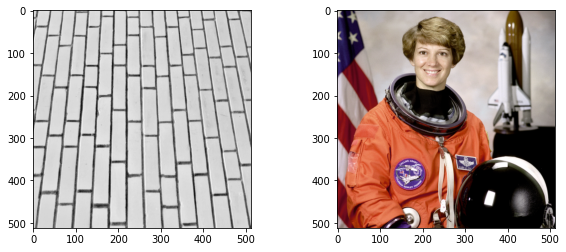

In [41]:
ex_pb = data.brick()
ex_rgb = data.astronaut()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(ex_pb, cmap='Greys')
plt.subplot(1, 2, 2)
plt.imshow(ex_rgb)
plt.show()

In [42]:
conv = nn.Conv2d(1, 16, kernel_size=3, padding=1)

In [43]:
ex_pb_tns = torch.Tensor(ex_pb).view(1, 1, ex_pb.shape[0], ex_pb.shape[1])
ex_pb_tns.size()

torch.Size([1, 1, 512, 512])

In [44]:
conv(ex_pb_tns).size()

torch.Size([1, 16, 512, 512])

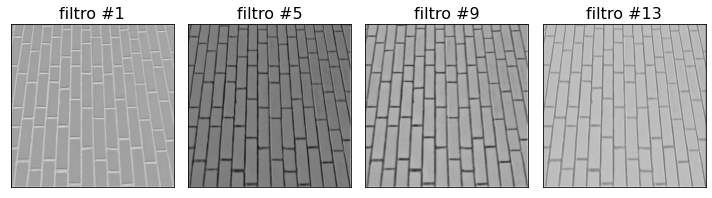

In [45]:
_ = conv(ex_pb_tns).data.numpy()[0]

plt.figure(figsize=(10, 6))

for i in range(0,16,4):
    plt.subplot(1, 4, int(i/4)+1)
    plt.title(f'filtro #{i+1}', fontsize=16)
    plt.imshow(_[i-1], cmap='Greys')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()    

In [46]:
conv = nn.Conv2d(3, 16, kernel_size=3, padding=1)

In [47]:
ex_rgb_tns = torch.Tensor(ex_rgb).permute(2, 0, 1).unsqueeze(0)
ex_rgb_tns.size()

torch.Size([1, 3, 512, 512])

In [48]:
conv(ex_rgb_tns).size()

torch.Size([1, 16, 512, 512])

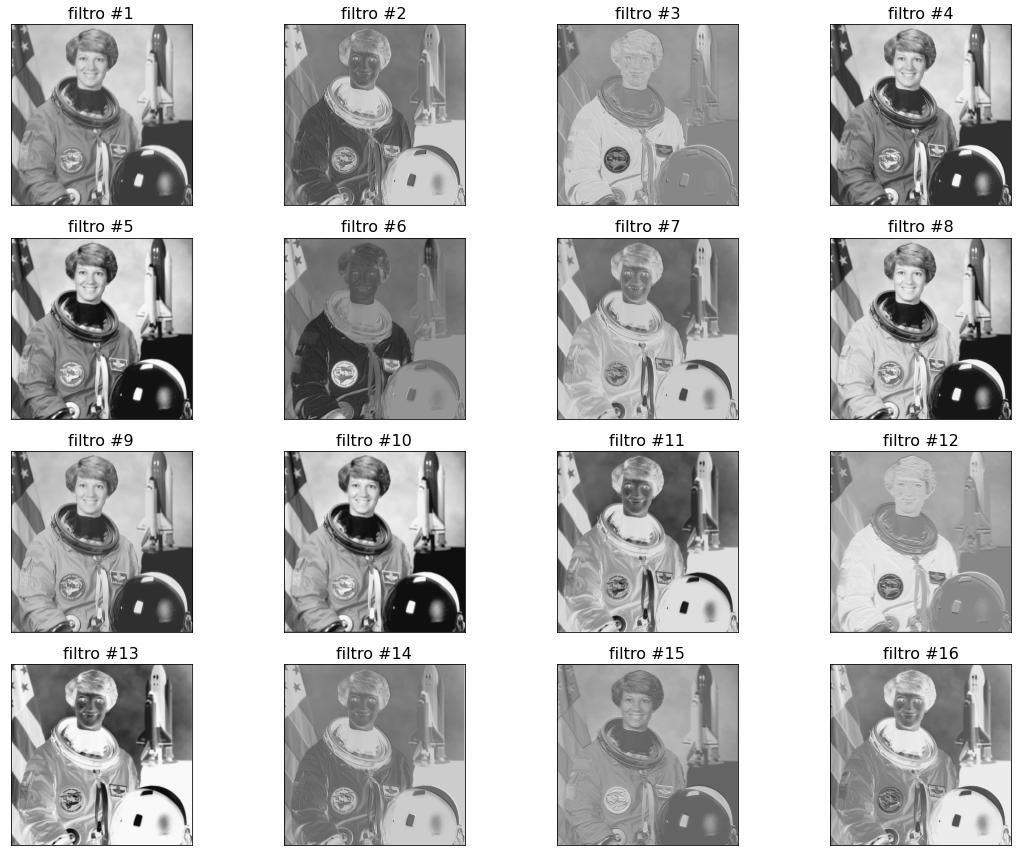

In [49]:
_ = conv(ex_rgb_tns).data.numpy()[0]

plt.figure(figsize=(16, 12))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(f'filtro #{i+1}', fontsize=16)
    plt.imshow(_[i-1], cmap='Greys')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()    

In [50]:
img_tns = torch.Tensor(img).permute(2, 0, 1).unsqueeze(0)
img_tns.size()

torch.Size([1, 3, 408, 612])

torch.Size([1, 16, 408, 612])


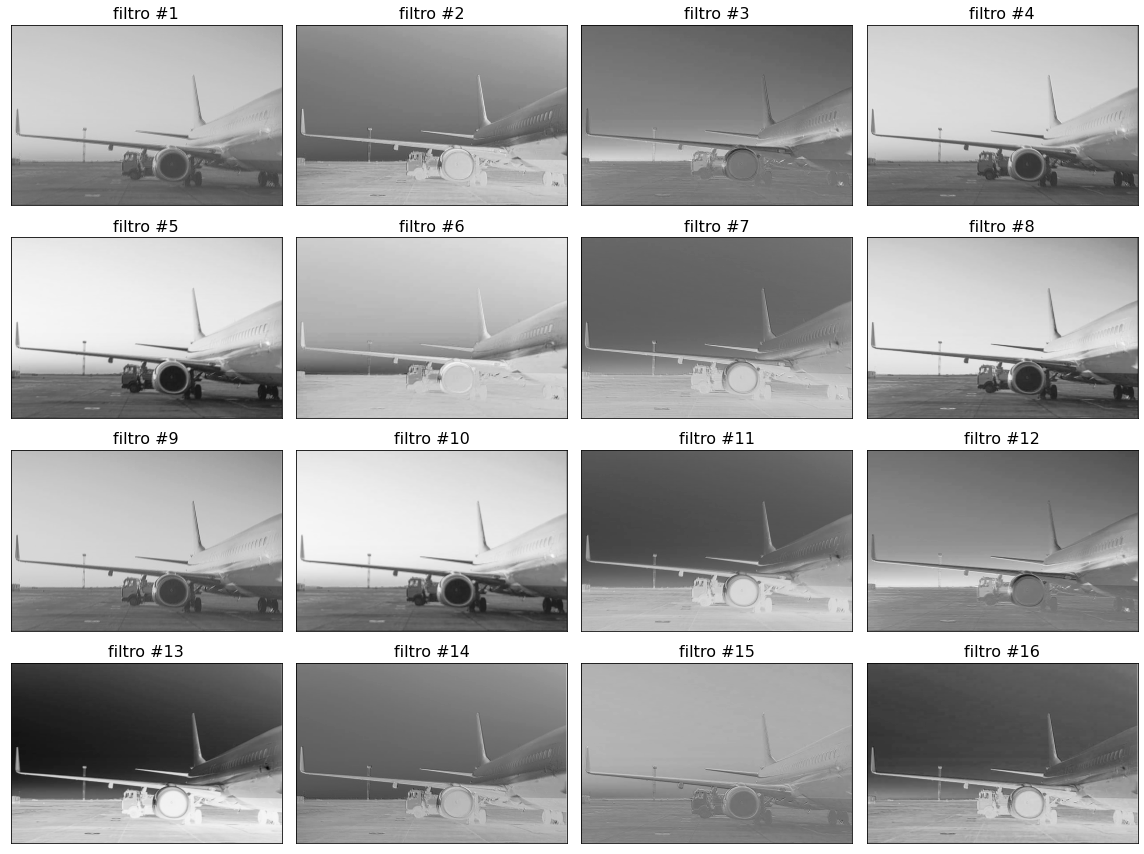

In [51]:
_ = conv(img_tns)
print(_.size())
_ = _.data.numpy()[0]

plt.figure(figsize=(16, 12))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(f'filtro #{i+1}', fontsize=16)
    plt.imshow(_[i-1], cmap='Greys')
    plt.xticks([])
    plt.yticks([])

# plt.savefig('etc/conv_aviao.jpg')

plt.tight_layout()
plt.show()    

- ### Pooling

In [52]:
_ = torch.Tensor(np.random.randint(low=0, high=10, size=(3,3,3)))
_

tensor([[[8., 0., 5.],
         [3., 4., 0.],
         [2., 2., 1.]],

        [[1., 7., 1.],
         [7., 2., 6.],
         [3., 6., 8.]],

        [[0., 9., 1.],
         [9., 0., 8.],
         [7., 7., 9.]]])

In [53]:
maxpool = nn.MaxPool2d(2, 1)

In [54]:
maxpool(_)

tensor([[[8., 5.],
         [4., 4.]],

        [[7., 7.],
         [7., 8.]],

        [[9., 9.],
         [9., 9.]]])

torch.Size([1, 16, 407, 611])


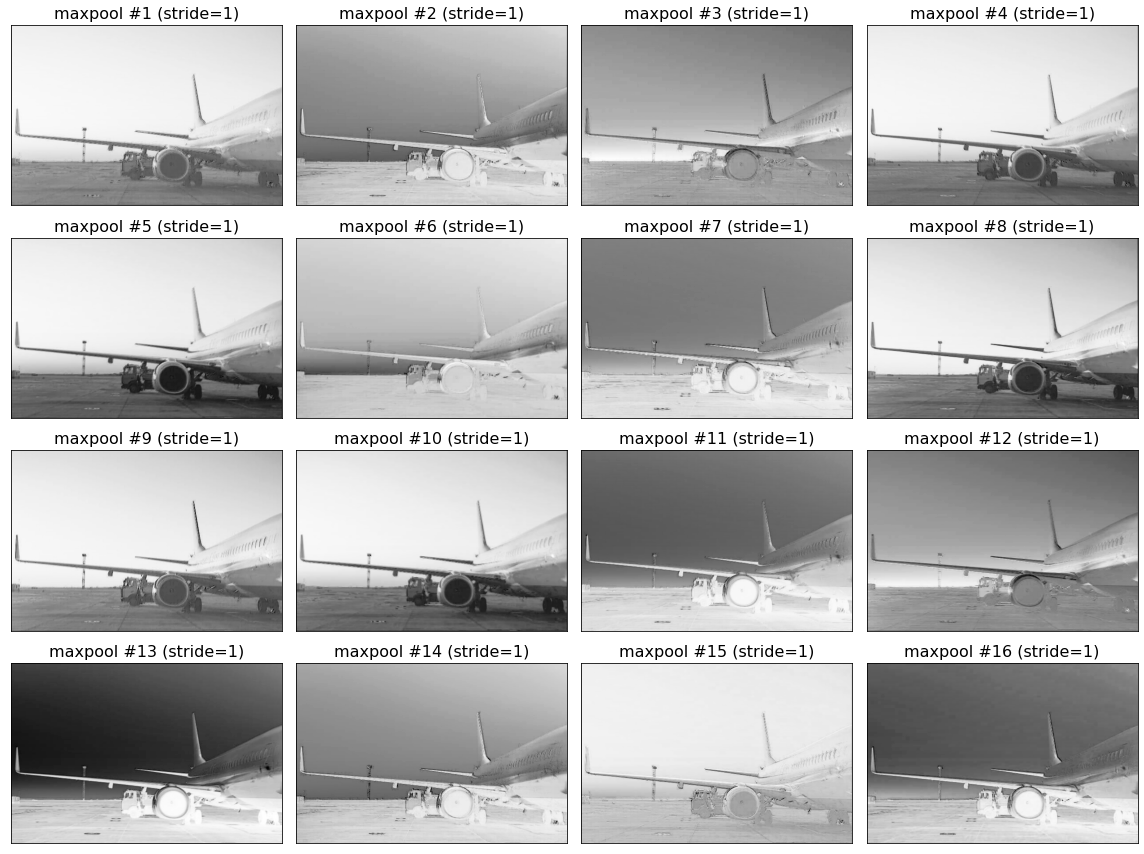

In [55]:
_ = conv(img_tns)
_ = maxpool(_)

print(_.size())

_ = _.data.numpy()[0]

plt.figure(figsize=(16, 12))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(f'maxpool #{i+1} (stride=1)', fontsize=16)
    plt.imshow(_[i-1], cmap='Greys')
    plt.xticks([])
    plt.yticks([])

# plt.savefig('etc/conv_maxpool_aviao.jpg')

plt.tight_layout()
plt.show()

torch.Size([1, 16, 204, 306])


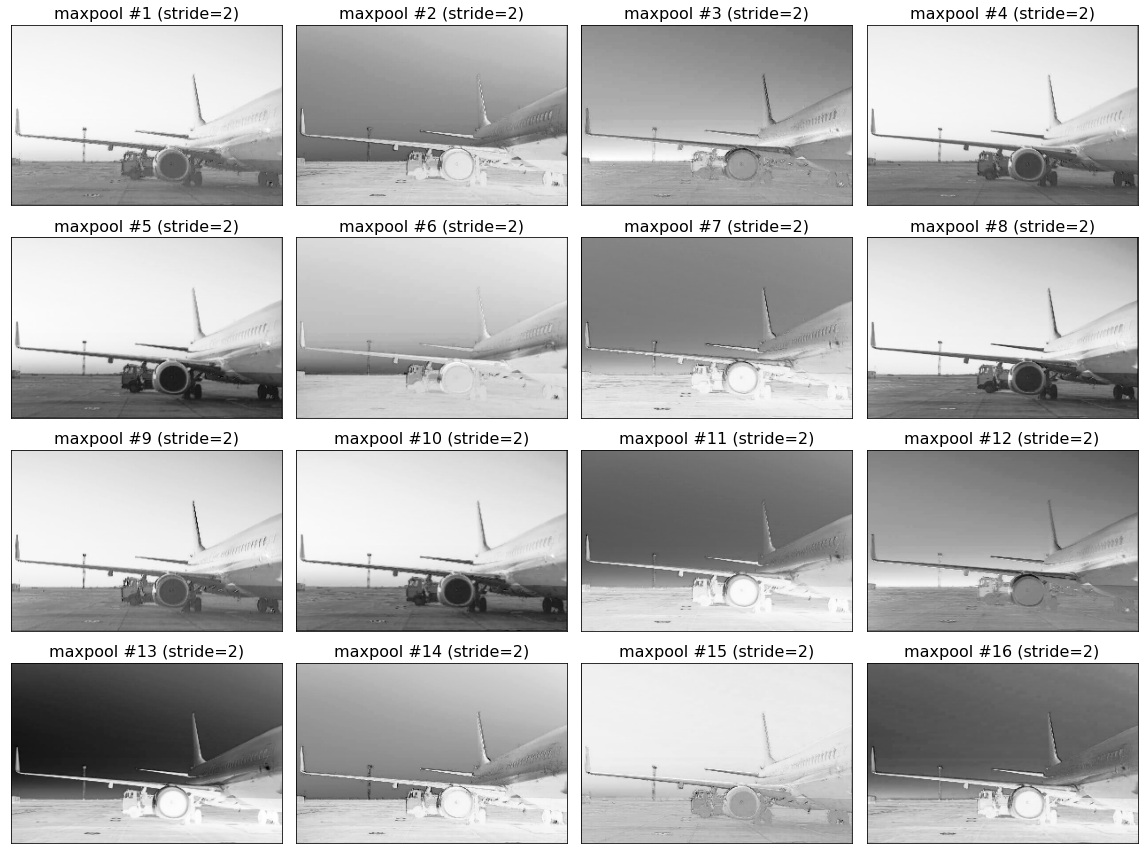

In [56]:
_ = conv(img_tns)
_ = nn.MaxPool2d(2, stride=2)(_)

print(_.size())

_ = _.data.numpy()[0]

plt.figure(figsize=(16, 12))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title(f'maxpool #{i+1} (stride=2)', fontsize=16)
    plt.imshow(_[i-1], cmap='Greys')
    plt.xticks([])
    plt.yticks([])

# plt.savefig('etc/conv_maxpool_sride2_aviao.jpg')

plt.tight_layout()
plt.show()

- ### Batch Normalization

"Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper _Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift*_"

In [57]:
bloconv = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=1)   
)

bloconv

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
)

In [58]:
ex_rgb_tns.size()

torch.Size([1, 3, 512, 512])

In [59]:
bloconv(ex_rgb_tns).size()

torch.Size([1, 32, 511, 511])

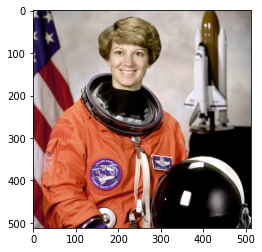

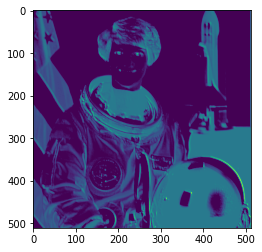

In [60]:
plt.imshow(ex_rgb)
plt.show()

plt.imshow(bloconv(ex_rgb_tns).data.numpy()[0][0])
plt.show()

- ### Construindo a rede (LeNET 5)

In [61]:
def lenet5():
    rede = nn.Sequential(
        # entrada
        nn.Conv2d(3, 6, kernel_size=5),
        nn.BatchNorm2d(6),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        # bloco conv
        nn.Conv2d(6, 16, kernel_size=5),
        nn.BatchNorm2d(16),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        # bloco conv
        nn.Conv2d(16, 120, kernel_size=5),
        nn.BatchNorm2d(120),
        nn.Tanh(),
        nn.Flatten(120*1*1),
        # fully connected
        nn.Linear(120, 84),
        nn.Tanh(),
        # saída
        nn.Linear(84, 10),
    )
    return rede

In [62]:
try:
    train_set = datasets.CIFAR10('datasets/',
                                 train=True,
                                 transform=transforms.ToTensor(),
                                 download=True)
    test_set = datasets.CIFAR10('datasets/',
                                 train=False,
                                 transform=transforms.ToTensor(),
                                 download=True)

    train_loader = DataLoader(dataset=train_set, batch_size=50)
    test_loader = DataLoader(dataset=test_set, batch_size=50)

except Exception as e:
    print(e)

<urlopen error [Errno 104] Connection reset by peer>


## ...

- ### Hiperparâmetros

In [63]:
hparams = dict(
    lr=13-5,
    weight_decay=5e-4,
    batch_size=50,
    epochs=100
)

hparams

{'lr': 8, 'weight_decay': 0.0005, 'batch_size': 50, 'epochs': 100}

In [64]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [65]:
modelo = lenet5()

In [66]:
otimizador = optim.Adam(modelo.parameters(), lr=hparams['lr'], weight_decay=hparams['weight_decay'])
otimizador

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 8
    weight_decay: 0.0005
)

Loop de treinamento:

In [67]:
try:
    for e in range(hparams['epochs']):
        for batch in train_loader:

            dado, rotulo = batch

            # forward
            pred = modelo(dado)

            # backward
            loss = loss_func(pred, rotulo)

            otimizador.zero_grad()

            loss.backward()
            otimizador.step()

except Exception as e:
    print(e)

name 'train_loader' is not defined


- ### Modelos pré-treinados

In [68]:
try:
    modelo = models.vgg16_bn(pretrained=True)
    modelo()

except Exception as e:
    print(e)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/f4119597/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


<urlopen error [Errno 104] Connection reset by peer>


$\blacksquare$ cqd